In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
import glob

In [ ]:
# print('학습용 데이터 개수:', len(glob.glob('train/images/*')))
print('학습용 라벨 개수:', len(glob.glob('/content/drive/MyDrive/train_objects/train_objects_labeling/*')))
# print('시험용 데이터 개수:', len(glob.glob('test/images/*')))

학습용 라벨 개수: 1748


In [ ]:
# train label 경로 저장
train_labels = glob.glob('/content/drive/MyDrive/train_objects/train_objects_labeling/*')

### 필요한 함수 정의

In [ ]:
import pandas as pd

def readJSON(path):
    '''
    Parameters:
    ----------
    path: path to json file
    
    Returns:
    -------
    dict
        dict type of the json file
    '''
    with open(path) as f:
        data = json.load(f)
    
    return data

def getTypeName(dic):
    '''
    Parameters:
    -----------
    dic: result of readJSON
    
    Returns:
    --------
    pd.DataFrame
        dataframe with image_id as index and number of each objects contained in the image as values
    '''
    
    output = {}
    image_id = dic['features'][0]['properties']['image_id']
    
    for i in range(len(dic['features'])):
        
        type_name = dic['features'][i]['properties']['type_name']
        
        if output.get(type_name) == None :
            output[type_name] = 1
            
        else :
            output[type_name] += 1
            
    return pd.DataFrame(output, index = [image_id])

### 함수 실행하여 데이터 프레임 형성

In [ ]:
%%time

total_df = pd.DataFrame()

for path in train_labels:
    
    total_df = pd.concat([total_df, getTypeName(readJSON(path))], axis = 0, join = 'outer')
    
total_df.fillna(0, inplace = True)

CPU times: user 17.4 s, sys: 1.03 s, total: 18.4 s
Wall time: 9min 6s


In [ ]:
total_df

,bus,military aircraft,helipad,small car,grouped container,individual container,civilian aircraft,truck,roundabout,etc,small ship,outdoor playground,dam,swimming pool,large ship,crane,bridge,oil tank,train,indoor playground,helicopter
OBJ04370_PS3_K3A_NIA0285.png,2.0,15.0,1.0,19.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ04380_PS3_K3A_NIA0287.png,0.0,0.0,0.0,11.0,0.0,0.0,25.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ04376_PS3_K3A_NIA0286.png,37.0,0.0,0.0,745.0,6.0,4.0,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ04372_PS3_K3A_NIA0286.png,28.0,0.0,0.0,631.0,0.0,0.0,0.0,21.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ04377_PS3_K3A_NIA0286.png,1.0,0.0,0.0,307.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OBJ04366_PS3_K3A_NIA0285.png,2.0,0.0,0.0,103.0,0.0,2.0,0.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ04361_PS3_K3A_NIA0285.png,1.0,0.0,0.0,92.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ04368_PS3_K3A_NIA0285.png,1.0,0.0,0.0,12.0,0.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
OBJ04367_PS3_K3A_NIA0285.png,3.0,0.0,0.0,151.0,0.0,0.0,0.0,27.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0


파일별 기록된 객체 정보가 정리된 데이터프레임입니다.
가령 OBJ04370_PS3_K3A_NIA0285.png 파일에는 bus 2대, military aircraft 15대, helipad 1대, individual container 1대가 기록되어 있습니다. 

In [ ]:
total_df.sum().sort_values()

indoor playground           43.0
dam                        164.0
helicopter                 184.0
bridge                     266.0
outdoor playground         276.0
helipad                    309.0
roundabout                 371.0
crane                      496.0
large ship                 546.0
civilian aircraft          875.0
military aircraft         1298.0
etc                       1542.0
oil tank                  1631.0
swimming pool             2188.0
individual container      5959.0
grouped container         8069.0
bus                       8698.0
train                    10331.0
small ship               19238.0
truck                    27067.0
small car               334199.0
dtype: float64

In [ ]:
print('훈련셋 내에 총 object 개수:', total_df.sum().sum())
total_df.sum().sort_values() / total_df.sum().sum()

훈련셋 내에 총 object 개수: 423750.0


indoor playground       0.000101
dam                     0.000387
helicopter              0.000434
bridge                  0.000628
outdoor playground      0.000651
helipad                 0.000729
roundabout              0.000876
crane                   0.001171
large ship              0.001288
civilian aircraft       0.002065
military aircraft       0.003063
etc                     0.003639
oil tank                0.003849
swimming pool           0.005163
individual container    0.014063
grouped container       0.019042
bus                     0.020526
train                   0.024380
small ship              0.045399
truck                   0.063875
small car               0.788670
dtype: float64

- object들이 불균등하게 분포 되어 있는것을 확인
- 131,436 객체들 중 78%가 small car로 구성됨


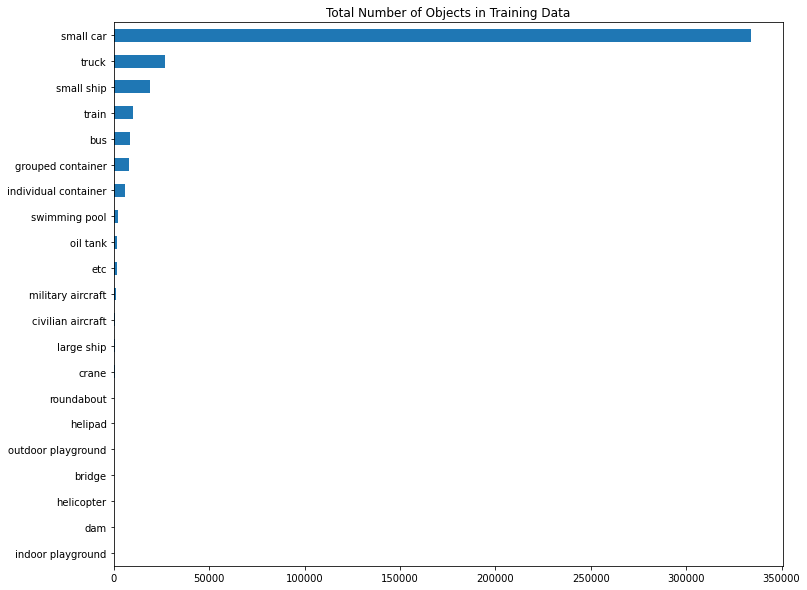

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
total_df.sum().sort_values().plot(kind = 'barh', title = 'Total Number of Objects in Training Data')